# [Canada and provinces, seasonally adjusted at annual rates, monthly](https://open.canada.ca/data/en/dataset/b6bbdaa5-b104-4c9e-bae6-7d7fd7500185)
* https://open.canada.ca/data/en/dataset/b6bbdaa5-b104-4c9e-bae6-7d7fd7500185

In [1]:
#Importing Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

%matplotlib inline

In [2]:
#Reading a file
df = pd.read_csv('/Users/jay/Desktop/Personal-Projects/dataset/34100160.csv')
df.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1990-01,Canada,2016A000011124,Units,300,thousands,3,v52300198,1,38.975,NaN,NaN,NaN,3
1,1990-01,Atlantic provinces,2016A00011,Units,300,thousands,3,v52300199,2,7.239,NaN,NaN,NaN,3
2,1990-01,Newfoundland and Labrador,2016A000210,Units,300,thousands,3,v52300200,3,3.197,NaN,NaN,NaN,3
3,1990-01,Prince Edward Island,2016A000211,Units,300,thousands,3,v52300201,4,0.329,NaN,NaN,NaN,3
4,1990-01,Nova Scotia,2016A000212,Units,300,thousands,3,v52300202,5,2.926,NaN,NaN,NaN,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 14 columns):
REF_DATE         4680 non-null object
GEO              4680 non-null object
DGUID            4680 non-null object
UOM              4680 non-null object
UOM_ID           4680 non-null int64
SCALAR_FACTOR    4680 non-null object
SCALAR_ID        4680 non-null int64
VECTOR           4680 non-null object
COORDINATE       4680 non-null int64
VALUE            4680 non-null float64
STATUS           0 non-null float64
SYMBOL           0 non-null float64
TERMINATED       0 non-null float64
DECIMALS         4680 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 512.0+ KB


In [4]:
df.shape

(4680, 14)

In [5]:
#Checking missing values
missing = df.isnull().sum()
missing

REF_DATE            0
GEO                 0
DGUID               0
UOM                 0
UOM_ID              0
SCALAR_FACTOR       0
SCALAR_ID           0
VECTOR              0
COORDINATE          0
VALUE               0
STATUS           4680
SYMBOL           4680
TERMINATED       4680
DECIMALS            0
dtype: int64

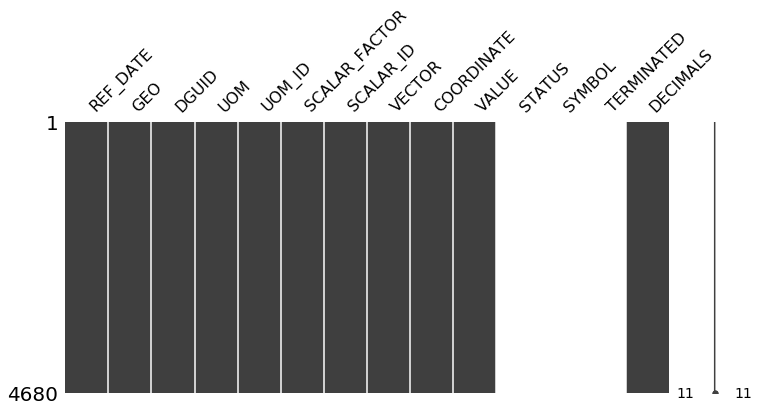

In [6]:
import missingno as msno

msno.matrix(df, figsize=(12,5))

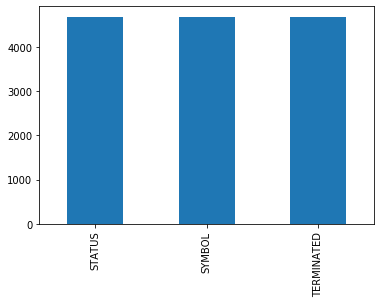

In [7]:
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar()

Values are missing in column *STATUS*, *SYMBOL*, *TERMINATED* 

In [8]:
df = df.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis = 1) 
df.shape

(4680, 11)

In [9]:
df.nunique()

REF_DATE          360
GEO                13
DGUID              13
UOM                 1
UOM_ID              1
SCALAR_FACTOR       1
SCALAR_ID           1
VECTOR             13
COORDINATE         13
VALUE            3404
DECIMALS            1
dtype: int64

In [10]:
df["REF_DATE"] = df['REF_DATE'].astype('datetime64[ns]')

In [11]:
df["year"] = df["REF_DATE"].dt.year
df["month"] = df["REF_DATE"].dt.month

In [12]:
df.head()

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,year,month
0,1990-01-01,Canada,2016A000011124,Units,300,thousands,3,v52300198,1,38.975,3,1990,1
1,1990-01-01,Atlantic provinces,2016A00011,Units,300,thousands,3,v52300199,2,7.239,3,1990,1
2,1990-01-01,Newfoundland and Labrador,2016A000210,Units,300,thousands,3,v52300200,3,3.197,3,1990,1
3,1990-01-01,Prince Edward Island,2016A000211,Units,300,thousands,3,v52300201,4,0.329,3,1990,1
4,1990-01-01,Nova Scotia,2016A000212,Units,300,thousands,3,v52300202,5,2.926,3,1990,1


In [13]:
df = df.drop(['DGUID', 'UOM', 'UOM_ID','SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'DECIMALS'], axis = 1) 

In [14]:
df.shape

(4680, 5)

In [15]:
df.head()

,REF_DATE,GEO,VALUE,year,month
0,1990-01-01,Canada,38.975,1990,1
1,1990-01-01,Atlantic provinces,7.239,1990,1
2,1990-01-01,Newfoundland and Labrador,3.197,1990,1
3,1990-01-01,Prince Edward Island,0.329,1990,1
4,1990-01-01,Nova Scotia,2.926,1990,1


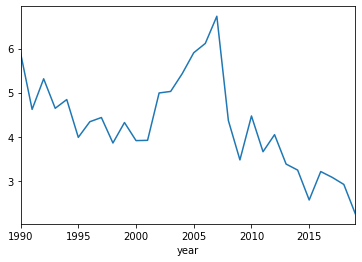

In [16]:
annual = df.groupby(['year']).mean().VALUE
annual.plot()

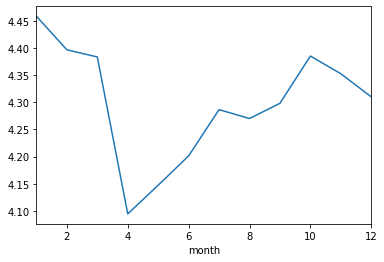

In [17]:
monthly = df.groupby(['month']).mean().VALUE
monthly.plot()

In [18]:
df_canada=df[(df.GEO == "Canada")]

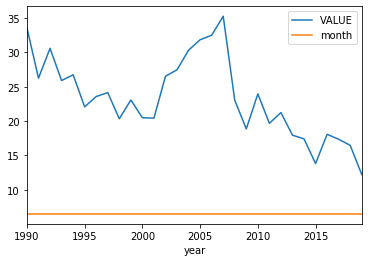

In [19]:
canada_annual = df_canada.groupby(['year']).mean()
canada_annual.plot()

In [20]:
df = df.drop(df[df.GEO == 'Canada'].index)

In [21]:
df_90_00 = df[(df.year >= 1990) & (df.year <= 2000)]
df_90_00.head()

,REF_DATE,GEO,VALUE,year,month
1,1990-01-01,Atlantic provinces,7.239,1990,1
2,1990-01-01,Newfoundland and Labrador,3.197,1990,1
3,1990-01-01,Prince Edward Island,0.329,1990,1
4,1990-01-01,Nova Scotia,2.926,1990,1
5,1990-01-01,New Brunswick,0.787,1990,1


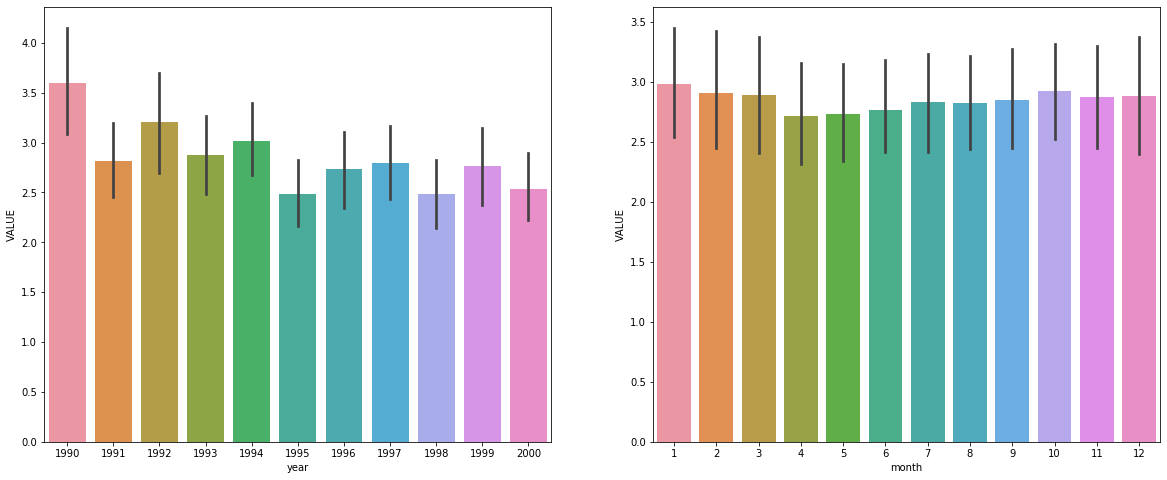

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=df_90_00, x='year', y='VALUE', ax=axes[0])
sns.barplot(data=df_90_00, x='month', y='VALUE', ax=axes[1])

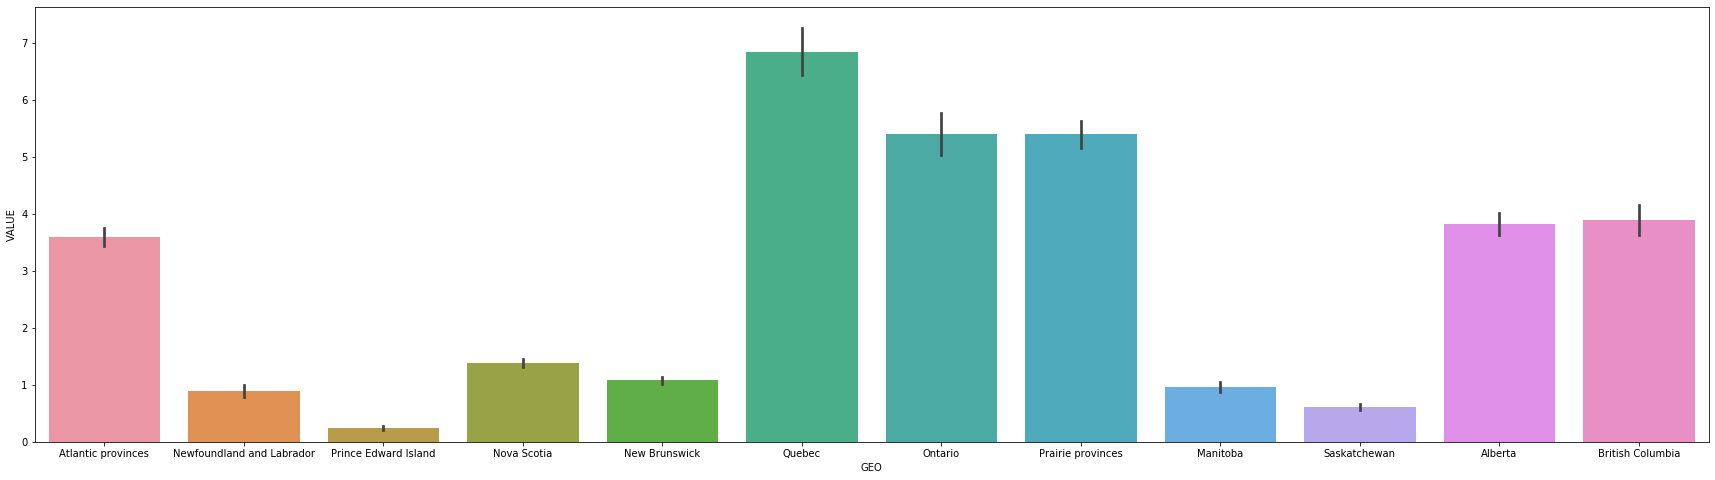

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(30,8)

sns.barplot(data=df_90_00, x='GEO', y='VALUE', ax=axes)

In [25]:
df_01_11 = df[(df.year >= 2001) & (df.year <= 2011)]
df_01_11.head()

,REF_DATE,GEO,VALUE,year,month
1717,2001-01-01,Atlantic provinces,3.613,2001,1
1718,2001-01-01,Newfoundland and Labrador,0.207,2001,1
1719,2001-01-01,Prince Edward Island,0.332,2001,1
1720,2001-01-01,Nova Scotia,1.235,2001,1
1721,2001-01-01,New Brunswick,1.839,2001,1


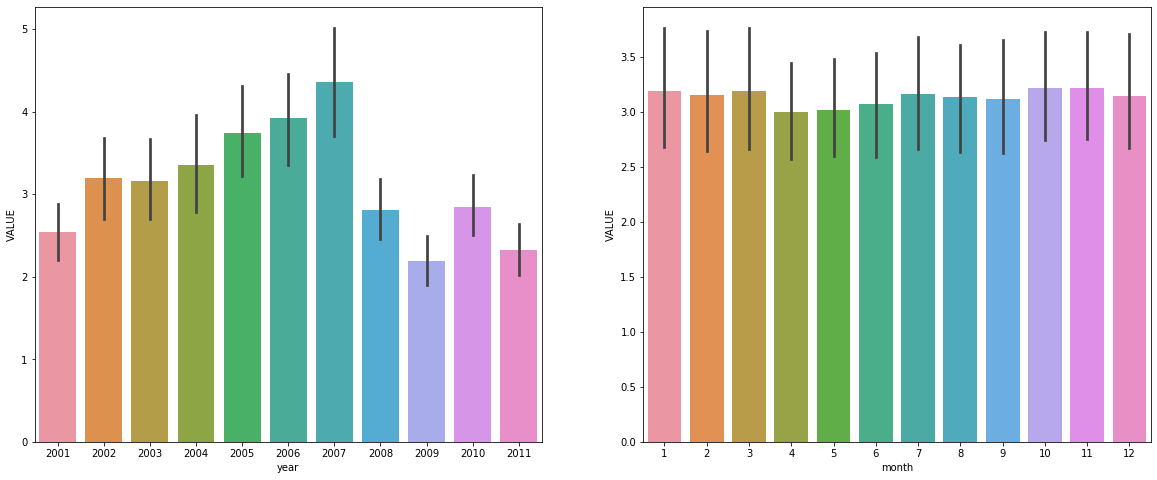

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=df_01_11, x='year', y='VALUE', ax=axes[0])
sns.barplot(data=df_01_11, x='month', y='VALUE', ax=axes[1])

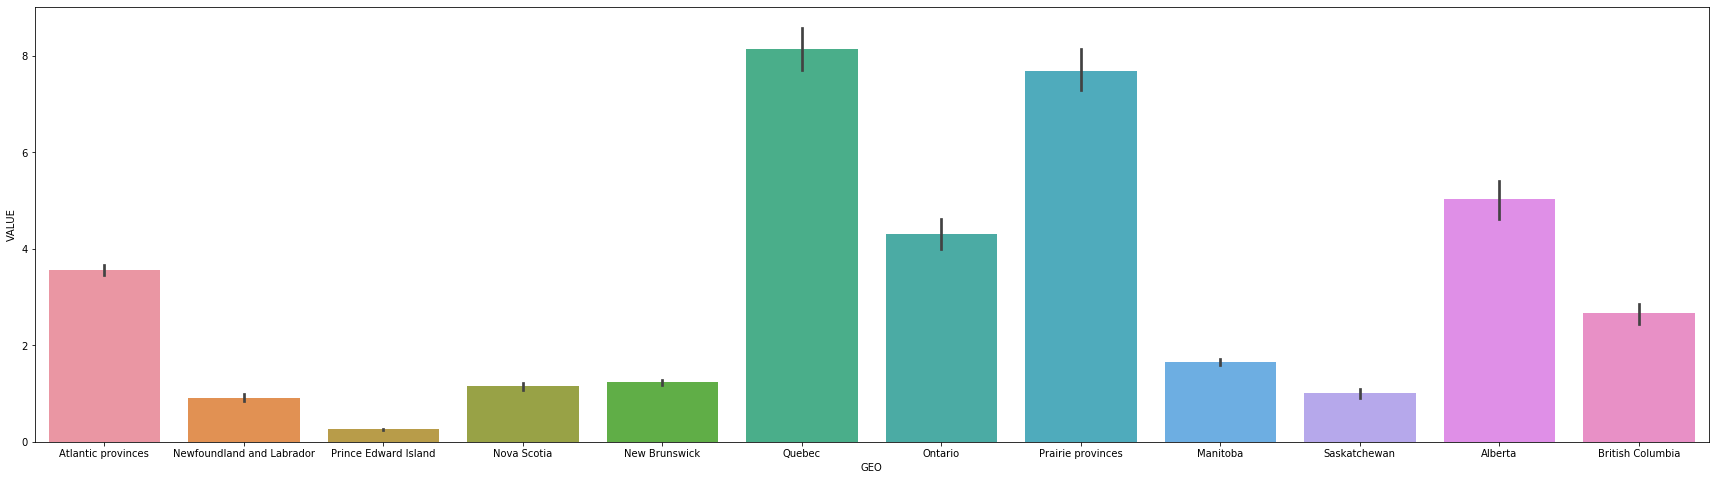

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(30,8)

sns.barplot(data=df_01_11, x='GEO', y='VALUE', ax=axes)

In [28]:
df_11_19 = df[(df.year >= 2012)]
df_11_19.head()

,REF_DATE,GEO,VALUE,year,month
3433,2012-01-01,Atlantic provinces,2.728,2012,1
3434,2012-01-01,Newfoundland and Labrador,1.234,2012,1
3435,2012-01-01,Prince Edward Island,0.187,2012,1
3436,2012-01-01,Nova Scotia,0.584,2012,1
3437,2012-01-01,New Brunswick,0.723,2012,1


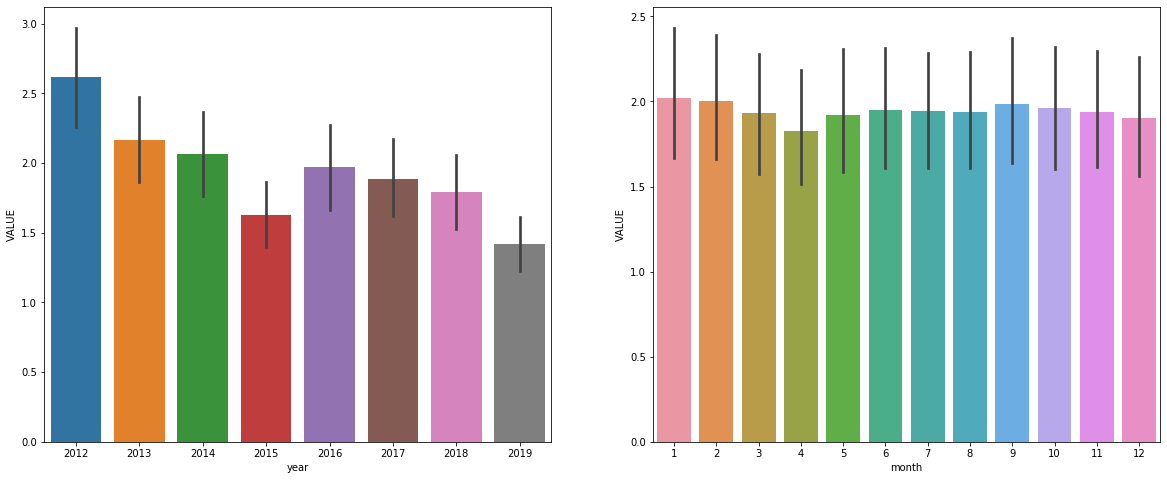

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=df_11_19, x='year', y='VALUE', ax=axes[0])
sns.barplot(data=df_11_19, x='month', y='VALUE', ax=axes[1])

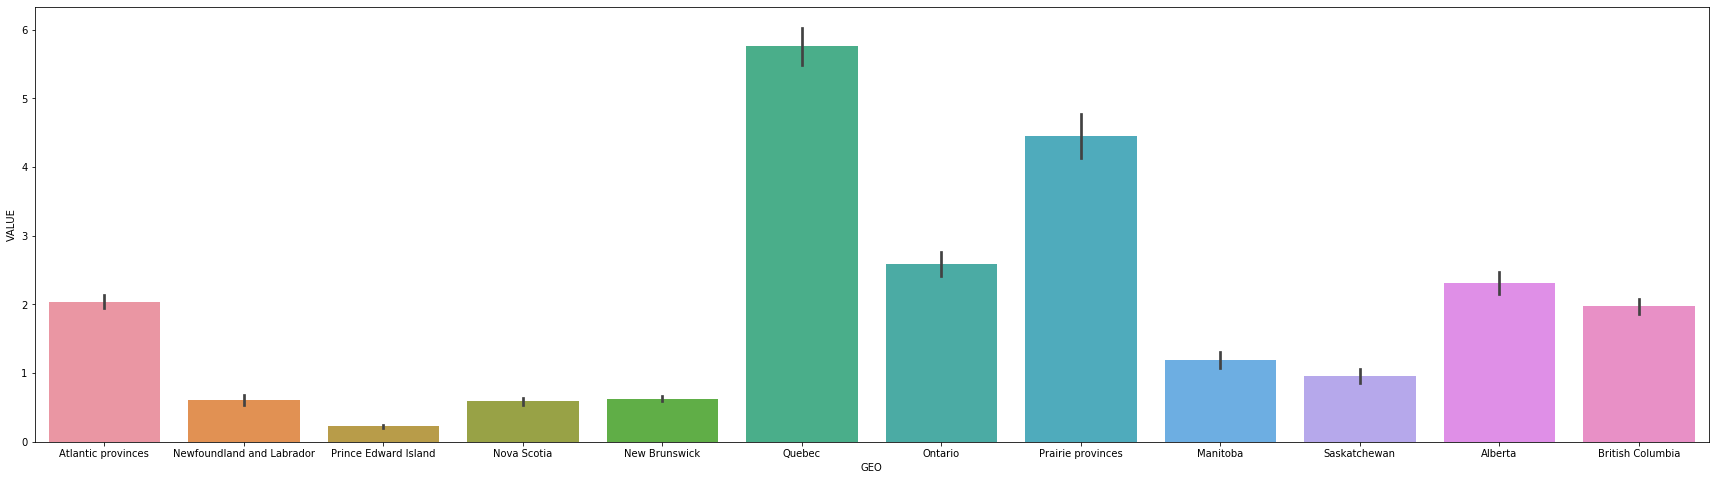

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(30,8)

sns.barplot(data=df_11_19, x='GEO', y='VALUE', ax=axes)